### Importación de datos



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [22]:
def find_col(df, candidates):
    """
    Devuelve el nombre real de la columna en df que coincida (ignorando mayúsculas/espacios)
    con alguna opción en candidates.
    """
    normalized = {c.strip().lower(): c for c in df.columns}
    for cand in candidates:
        key = cand.strip().lower()
        if key in normalized:
            return normalized[key]
    # Búsqueda más flexible (por si viene como "precio_producto" etc)
    for real in df.columns:
        r = real.strip().lower()
        for cand in candidates:
            if cand.strip().lower() in r:
                return real
    raise KeyError(f"No encontré una columna parecida a: {candidates}. Columnas disponibles: {list(df.columns)}")

In [23]:
# 0) Crear el diccionario stores (OBLIGATORIO)
stores = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

#1. Análisis de facturación



In [9]:
def ingreso_total(df):
    col_precio = find_col(df, ["Precio", "price", "preco"])
    return float(pd.to_numeric(df[col_precio], errors="coerce").fillna(0).sum())

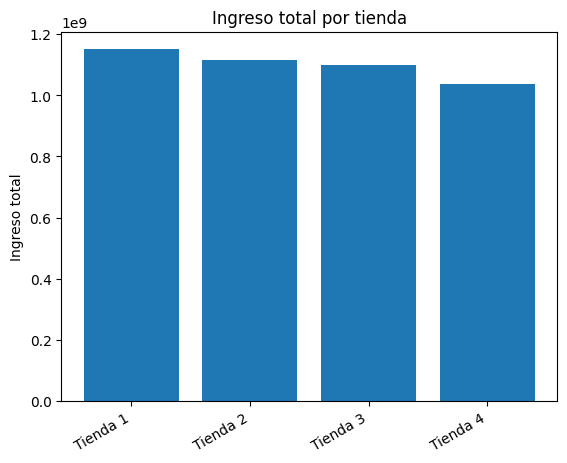

In [39]:
plt.figure()
plt.bar(df_resumen["Tienda"], df_resumen["Ingreso total"])
plt.title("Ingreso total por tienda")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Ingreso total")
plt.show()

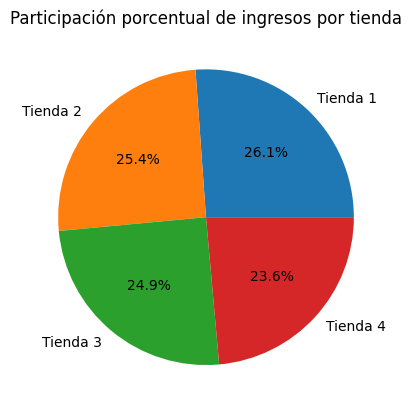

In [40]:
plt.figure()
plt.pie(
    df_resumen["Ingreso total"],
    labels=df_resumen["Tienda"],
    autopct='%1.1f%%'
)
plt.title("Participación porcentual de ingresos por tienda")
plt.show()

# 2. Ventas por categoría

In [10]:
def ventas_por_categoria(df, top_n=10):
    col_cat = find_col(df, ["Categoría", "Categoria", "category", "categoria"])
    return df[col_cat].value_counts().head(top_n)

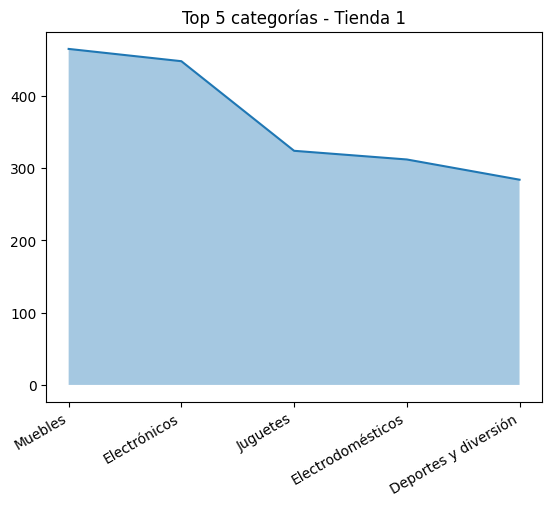

In [43]:
top = ventas_por_categoria(tienda, top_n=5)

plt.figure()
plt.fill_between(top.index.astype(str), top.values, alpha=0.4)
plt.plot(top.index.astype(str), top.values)
plt.title("Top 5 categorías - Tienda 1")
plt.xticks(rotation=30, ha="right")
plt.show()

# 3. Calificación promedio de la tienda

1.   Elemento de la lista
2.   Elemento de la lista




In [11]:
def calificacion_promedio(df):
    col_rating = find_col(df, ["Calificación", "Calificacion", "rating", "avaliacao", "evaluacion", "evaluación"])
    rating = pd.to_numeric(df[col_rating], errors="coerce")
    return float(rating.mean())

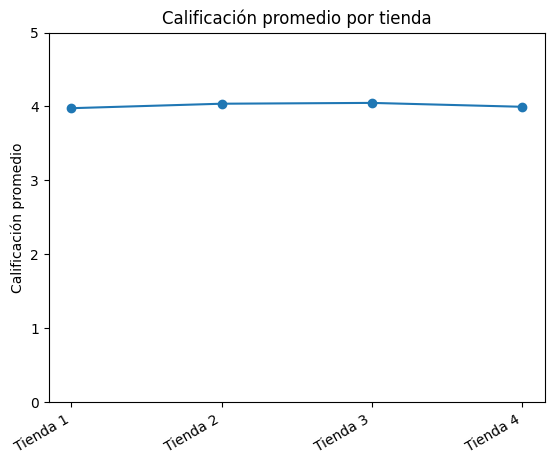

In [41]:
plt.figure()
plt.plot(
    df_resumen["Tienda"],
    df_resumen["Calificación promedio"],
    marker='o'
)
plt.title("Calificación promedio por tienda")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

In [12]:
def productos_mas_menos_vendidos(df, top_n=5):
    col_prod = find_col(df, ["Producto", "product", "produto", "nombre_producto", "nombre"])
    conteo = df[col_prod].value_counts()
    mas = conteo.head(top_n)
    menos = conteo.tail(top_n)
    return mas, menos

# 5. Envío promedio por tienda

In [13]:
def envio_promedio(df):
    col_envio = find_col(df, ["Envío", "Envio", "shipping", "frete"])
    envio = pd.to_numeric(df[col_envio], errors="coerce")
    return float(envio.mean())

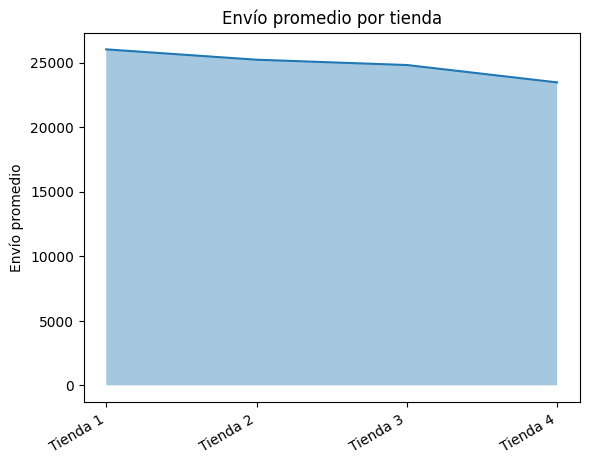

In [42]:
plt.figure()
plt.fill_between(
    df_resumen["Tienda"],
    df_resumen["Envío promedio"],
    alpha=0.4
)
plt.plot(
    df_resumen["Tienda"],
    df_resumen["Envío promedio"]
)
plt.title("Envío promedio por tienda")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Envío promedio")
plt.show()

In [14]:
def geo_cols(df):
    lat = None
    lon = None
    # comunes: lat/lon, latitude/longitude
    for a in ["lat", "latitude", "latitud"]:
        try:
            lat = find_col(df, [a])
            break
        except KeyError:
            pass
    for b in ["lon", "longitude", "longitud", "lng"]:
        try:
            lon = find_col(df, [b])
            break
        except KeyError:
            pass
    return lat, lon

In [44]:
!pip -q install folium
import folium
import pandas as pd

for nombre, df in stores.items():
    lat_col, lon_col = geo_cols(df)
    if not lat_col or not lon_col:
        print(f"{nombre}: No encontré columnas lat/lon, lo salto.")
        continue

    lat = pd.to_numeric(df[lat_col], errors="coerce")
    lon = pd.to_numeric(df[lon_col], errors="coerce")

    # Limpieza: quitar NaN
    tmp = pd.DataFrame({"lat": lat, "lon": lon}).dropna()

    if tmp.empty:
        print(f"{nombre}: lat/lon vacíos, lo salto.")
        continue

    # Centro del mapa (promedio)
    center = [tmp["lat"].mean(), tmp["lon"].mean()]
    m = folium.Map(location=center, zoom_start=10, tiles="OpenStreetMap")

    # Si hay MUCHOS puntos, toma una muestra para que no se ponga lento
    sample = tmp.sample(n=min(2000, len(tmp)), random_state=42)

    for _, row in sample.iterrows():
        folium.CircleMarker(
            location=[row["lat"], row["lon"]],
            radius=2,
            fill=True,
            fill_opacity=0.5,
            opacity=0.5
        ).add_to(m)

    print(f"Mapa - {nombre}")
    display(m)


Mapa - Tienda 1


Mapa - Tienda 2


Mapa - Tienda 3


Mapa - Tienda 4
